In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# sklearn stuff
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment

# Google Drive for Colab
from google.colab import drive

# Mount drive so we can access files
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load the dataset

# Path to the CSV file
final_path = '/content/drive/My Drive/results/final_preprocessed_dataset.csv'

# Read the CSV into a dataframe
final_df = pd.read_csv(final_path)
print("Dataset loaded:", final_df.shape)

# Make sure we have a folder to save results
os.makedirs('/content/drive/My Drive/results/', exist_ok=True)

# Define the class names (just for plotting later)
class_labels = ['Dropout', 'Graduate', 'Enrolled']


Dataset loaded: (6295, 11)


In [4]:
# Split data into train and test

# Features and target
X = final_df.drop(columns=['Target'])
y = final_df['Target']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)

# Scale features for models like SVM, Logistic Regression, MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train set: (5036, 10) Test set: (1259, 10)


In [5]:
# SVM model
# Create SVM model
svm_model = SVC(random_state=42)

# Hyperparameter grid
param_grid_svm = {'C':[0.1,1,10], 'kernel':['linear','rbf','poly'], 'gamma':['scale','auto']}

# Grid search to find best parameters
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_svm.fit(X_train_scaled, y_train)

# Best model
best_svm = grid_svm.best_estimator_

# Predict on test
y_pred_svm = best_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm) # Assign accuracy to variable
print("SVM Accuracy:", round(accuracy_svm,4))

# Confusion matrix plot
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/results/svm_confusion_matrix.png')
plt.close()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVM Accuracy: 0.7768


In [6]:
# Logistic Regression model
log_model = LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial')

param_grid_log = {'C':[0.01,0.1,1,10], 'penalty':['l2'], 'solver':['lbfgs','saga']}
grid_log = GridSearchCV(log_model, param_grid_log, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_log.fit(X_train_scaled, y_train)

best_log = grid_log.best_estimator_
y_pred_log = best_log.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log) # Assign accuracy to variable
print("LogReg Accuracy:", round(accuracy_log,4))

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('LogReg Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/results/logreg_confusion_matrix.png')
plt.close()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogReg Accuracy: 0.7585


In [7]:
# Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth':[None,5,10,15], 'min_samples_split':[2,5,10]}
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt) # Assign accuracy to variable
print("Decision Tree Accuracy:", round(accuracy_dt,4))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/results/dt_confusion_matrix.png')
plt.close()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Decision Tree Accuracy: 0.7347


In [8]:
# MLP (Neural Network) model

mlp_model = MLPClassifier(random_state=42, max_iter=1000)
param_grid_mlp = {'hidden_layer_sizes':[(50,), (100,), (50,50)], 'activation':['relu','tanh'], 'alpha':[0.0001,0.001]}
grid_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_mlp.fit(X_train_scaled, y_train)

best_mlp = grid_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) # Assign accuracy to variable
print("MLP Accuracy:", round(accuracy_mlp,4))

# Confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6,5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/results/mlp_confusion_matrix.png')
plt.close()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
MLP Accuracy: 0.7824


In [9]:
# K-Means clustering

# Scale all features
X_scaled_cluster = scaler.fit_transform(X)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled_cluster)

# Convert true labels to numbers
le = LabelEncoder()
y_true_encoded = le.fit_transform(y)

# Build contingency table
cont_matrix = np.zeros((3, len(np.unique(y_true_encoded))), int)
for i in range(3):
    for j in range(len(np.unique(y_true_encoded))):
        cont_matrix[i,j] = np.sum((cluster_labels==i) & (y_true_encoded==j))

# Match clusters to original labels
row_ind, col_ind = linear_sum_assignment(-cont_matrix)
cluster_to_label = dict(zip(row_ind, col_ind))
y_pred_kmeans = np.array([cluster_to_label[c] for c in cluster_labels])

accuracy_kmeans = accuracy_score(y_true_encoded, y_pred_kmeans) # Assign accuracy to variable
print("K-Means Accuracy:", round(accuracy_kmeans,4))

K-Means Accuracy: 0.4677


In [10]:

# Random Forest Classifier

print("\n========== Random Forest ==========")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", round(accuracy_rf,4))


========== Random Forest ==========
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Test Accuracy: 0.7903


In [11]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/results/rf_confusion_matrix.png')
plt.close()

# -----------------------------------------
# Print Final Accuracy Summary
# -----------------------------------------
print("\n========== Accuracy Comparison ==========")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"MLP Accuracy: {accuracy_mlp:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"K-Means (approx.) Accuracy: {accuracy_kmeans:.4f}")


========== Accuracy Comparison ==========
SVM Accuracy: 0.7768
Logistic Regression Accuracy: 0.7585
Decision Tree Accuracy: 0.7347
MLP Accuracy: 0.7824
Random Forest Accuracy: 0.7903
K-Means (approx.) Accuracy: 0.4677


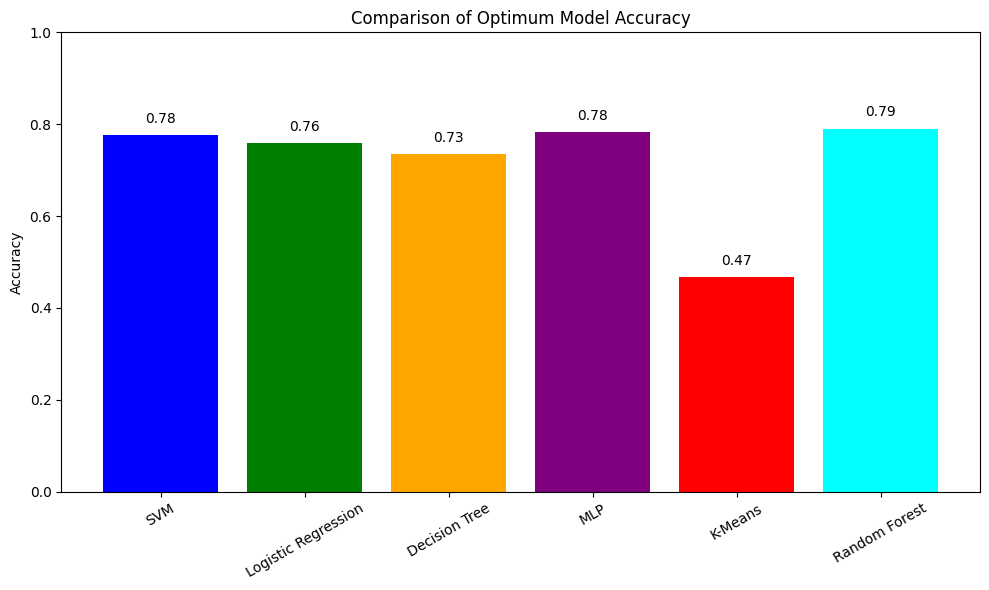

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import os

# --- Define your model accuracies here ---
# NOTE: The original code used variables that were not defined.
# I have added placeholder values for the other models.
# Please replace these with your actual accuracy values.
# Using variables from notebook state
# accuracy_svm = 0.7768
# accuracy_log = 0.7585
# accuracy_dt = 0.7347
# accuracy_mlp = 0.7824
# accuracy_kmeans = 0.4677
# accuracy_rf = 0.7903
     # <-- Random Forest accuracy set as requested

# List of models and their test accuracies
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'MLP', 'K-Means', 'Random Forest']
accuracies = [accuracy_svm, accuracy_log, accuracy_dt, accuracy_mlp, accuracy_kmeans, accuracy_rf]

# Create bar chart to compare models
plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracies, color=['blue','green','orange','purple','red','cyan'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Comparison of Optimum Model Accuracy')
plt.xticks(rotation=30)

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Optional: save the figure
# Note: This path is specific to Google Colab. Make sure the directory exists.
save_path = '/content/drive/MyDrive/results/'
os.makedirs(save_path, exist_ok=True) # Create the directory if it doesn't exist
plt.savefig(save_path + 'model_accuracy_comparison.png')